# Imports

In [48]:
import math
import pandas as pd
import numpy  as  np
import seaborn as sns
import inflection

from matplotlib import pyplot as plt
from matplotlib import gridspec

# Loading Data

In [4]:
df_sales_raw = pd.read_csv("./data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("./data/store.csv", low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# <span style="color: orange;">1.0.</span> Transformações iniciais dos Dados

In [16]:
df1 = df_raw.copy()

## <span style="color: orange;">1.1.</span> Renomear as Colunas

In [13]:
# Renomear as colunas para o estilo sanke_case
df1.columns = [inflection.underscore(col) for col in df1.columns]

In [14]:
df1.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## <span style="color: orange;">1.2.</span> Data Dimension

In [17]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Cols {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Cols 18


## <span style="color: orange;">1.3.</span> Tipo dos Dados

In [19]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## <span style="color: orange;">1.4.</span> Verifica NA

In [20]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## <span style="color: orange;">1.5.</span> Preencher os NA

In [26]:
# competition_distance -  suposição que quando competition_distance é NA significa que a loja não tem um competido próximo
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if pd.isna(x) else x)
          
# competition_open_since_month  
df1['competition_open_since_month'] = df1[['competition_open_since_month', 'date']].apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year 
df1['competition_open_since_year'] = df1[['competition_open_since_year', 'date']].apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week 
df1['promo2_since_week'] = df1[['promo2_since_week', 'date']].apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)            

# promo2_since_year   
df1['promo2_since_year'] = df1[['promo2_since_year', 'date']].apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# promo_interval
df1['promo_interval'].fillna(0, inplace=True)

month_map = {1 : 'Jan', 2 : 'Fev', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else
                                                                       1 if x['month_map'] in x['promo_interval'].split(',') else
                                                                       0, axis =1) 


## <span style="color: orange;">1.6.</span> Alterar Tipos

Ao criar novas colunas é importante checar de novo o tipo das colunas, pois o resultado das operações pode ter alterado o tipo original.

In [31]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

# <span style="color: orange;">2.0.</span> Estatística Descritiva

In [32]:
df2 = df1.copy()

In [33]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

## <span style="color: orange;">2.1.</span> Numerical Attributes

In [37]:
def get_first_order_statistics(df):
    # Central Tendency Metrics
    mean = pd.DataFrame(df.apply(np.mean)).T
    median = pd.DataFrame(df.apply(np.median)).T

    # Dispersion Metrics
    min_ = pd.DataFrame(df.apply(min)).T
    max_ = pd.DataFrame(df.apply(max)).T
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    std = pd.DataFrame(df.apply(np.std)).T
    skew = pd.DataFrame(df.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    # Metrics Concatenation
    m = pd.concat([min_, max_, range_, mean, median, std, skew, kurtosis]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return m

In [38]:
get_first_order_statistics(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


- Rossmann was founded in 1972. Values of Competition_open_since_year lower than 1972 indicate the years when closest competitors, from other pharmacy chains, were opened.

- The competition_distance variable has high positive values of skew and kurtosis, indicating that the distribution is skewed right and has a large tail.

- There is a vast difference in the range in some features. Higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training some models. It's needed to apply some sort of scaling over the features.

## <span style="color: orange;">2.2.</span> Categorical Attributes

In [40]:
 # How many levels there is  in each categorical attribute
cat_attributes.nunique()

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

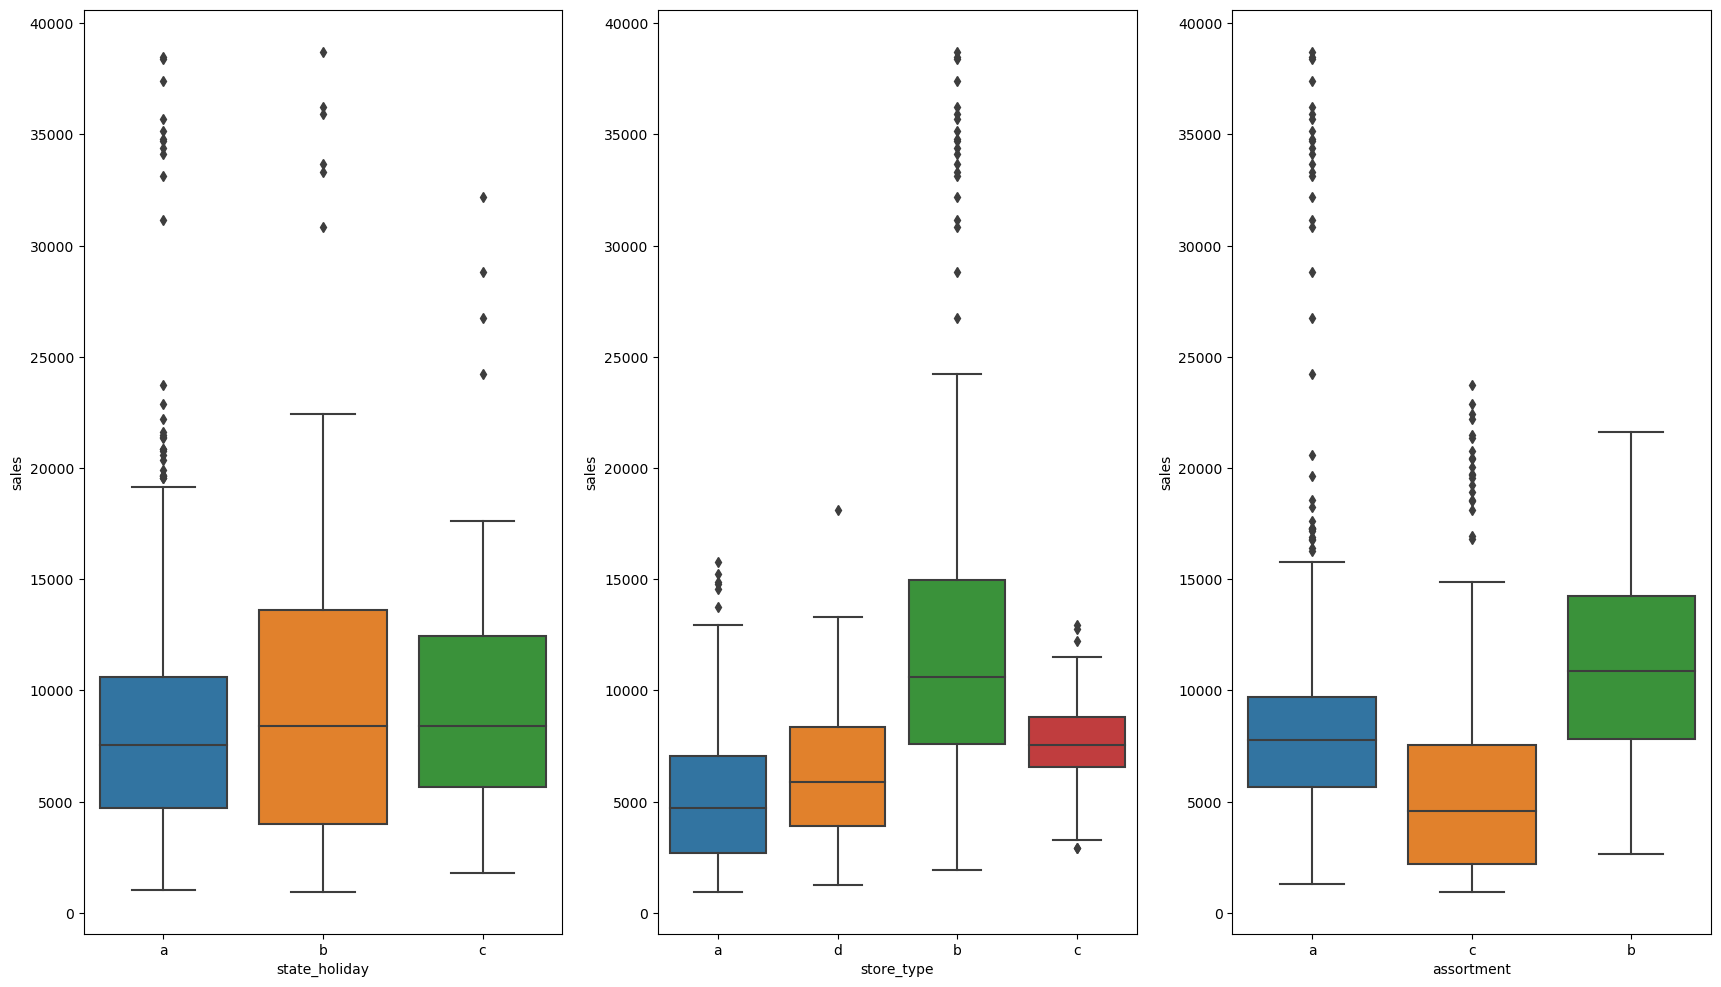

In [49]:
# Filtrar apenas registros em dias comerciais com vendas superiores a 0
aux1 =df1[(df1.state_holiday !='0' ) & (df1.sales > 0)]

# Boxplots são úteis para vizualizar medidas de dispersão e tendencia central em um gráfico apenas
# Linha do meio é a mediana
# box limitado pelos 25th quartil and 75th quartil
# Outliers fora do boxplot

fig = plt.figure(figsize=(21,12))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  # First row
ax2 = fig.add_subplot(specs[0,1])  # First row Second Column
ax3 = fig.add_subplot(specs[0,2])  # First row Third Column

sns.boxplot(x='state_holiday', y='sales', data=aux1, ax=ax1)

sns.boxplot(x='store_type', y='sales', data=aux1, ax=ax2)

sns.boxplot(x='assortment', y='sales', data=aux1, ax=ax3)